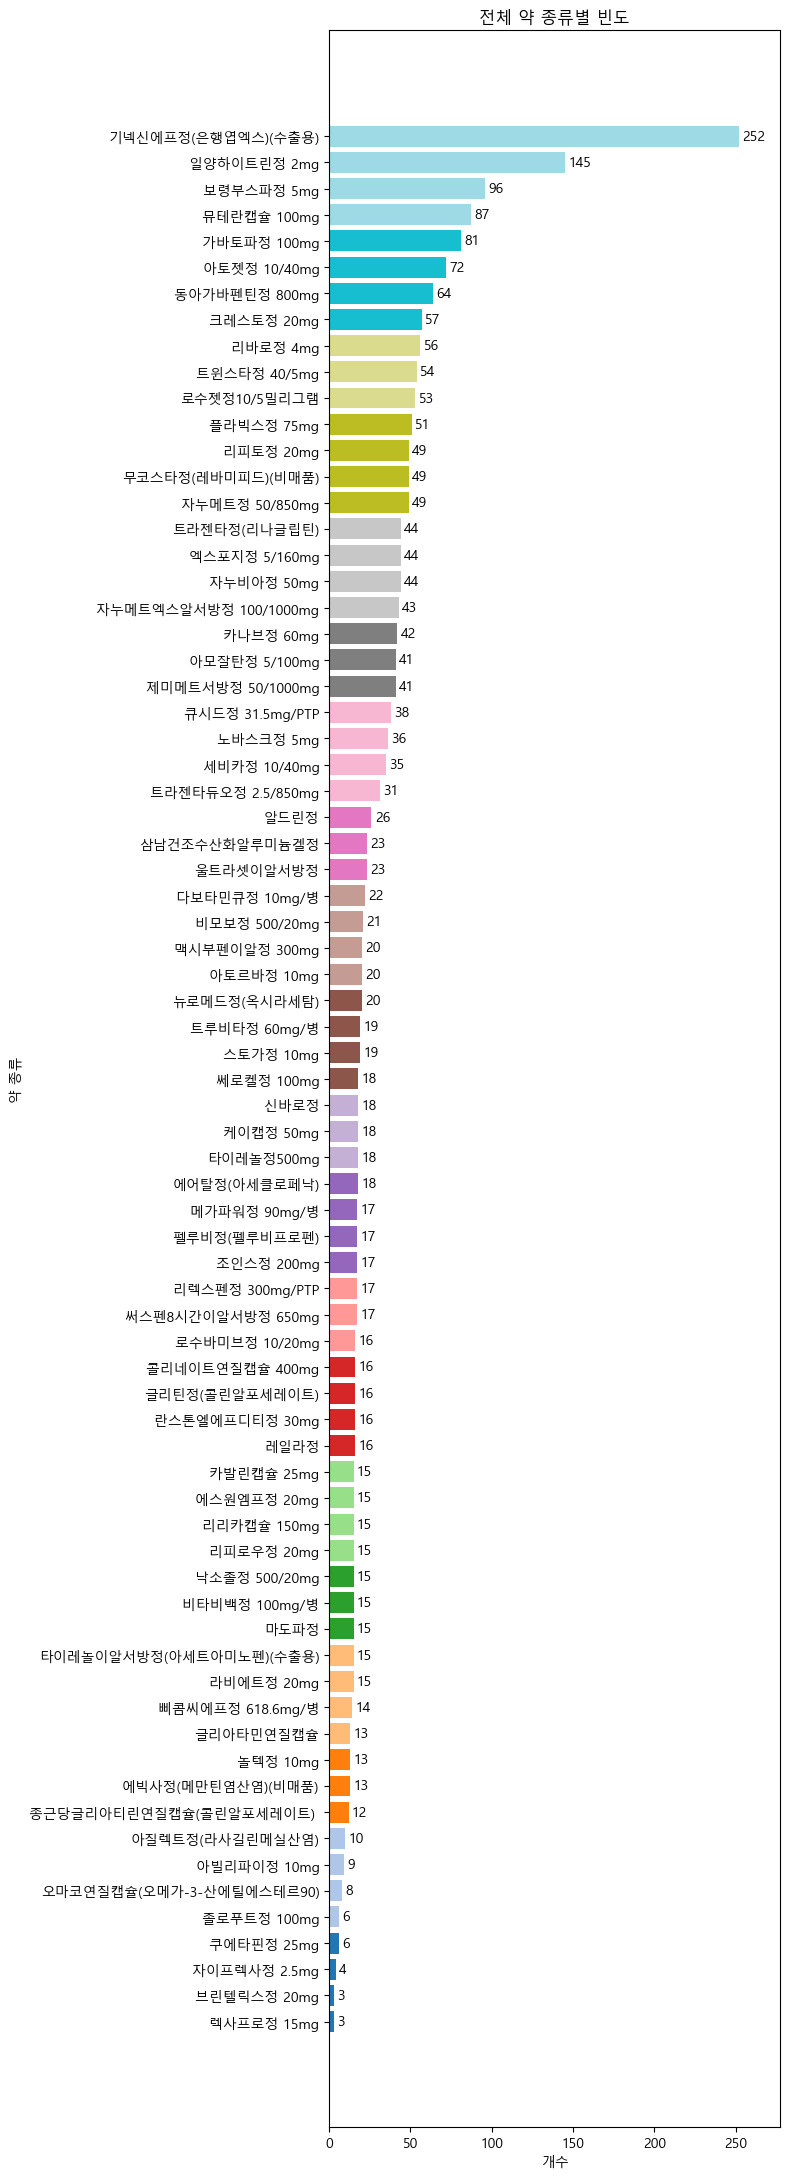

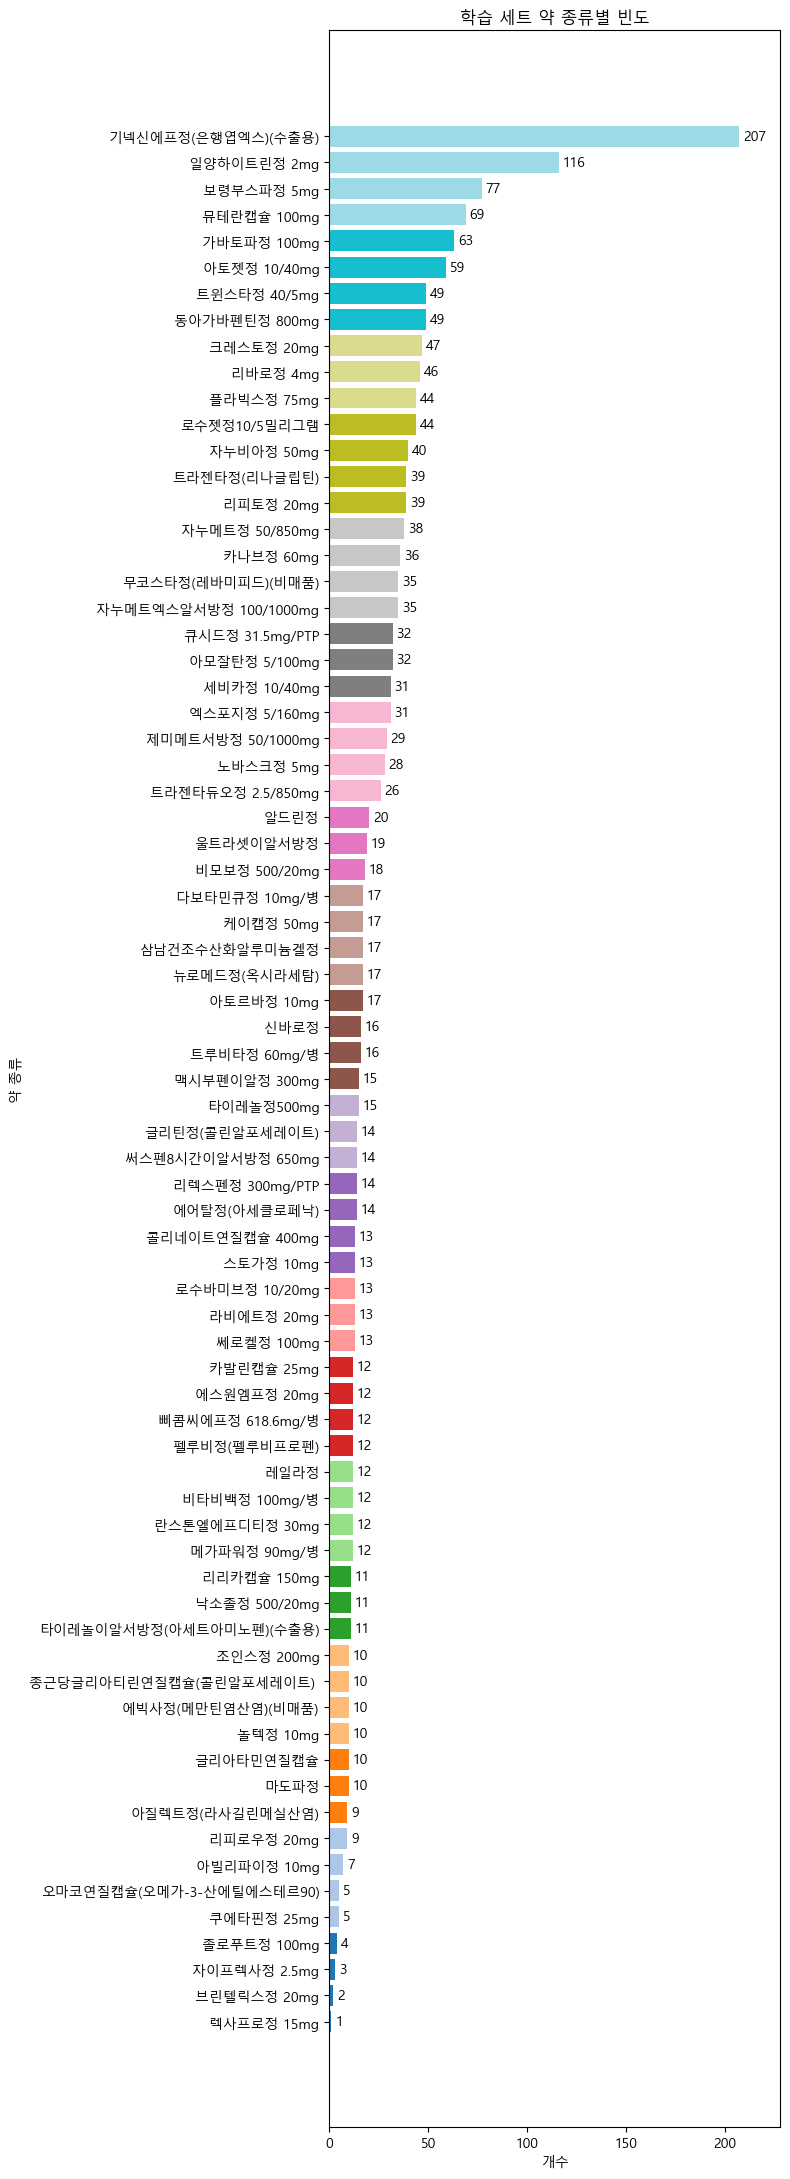

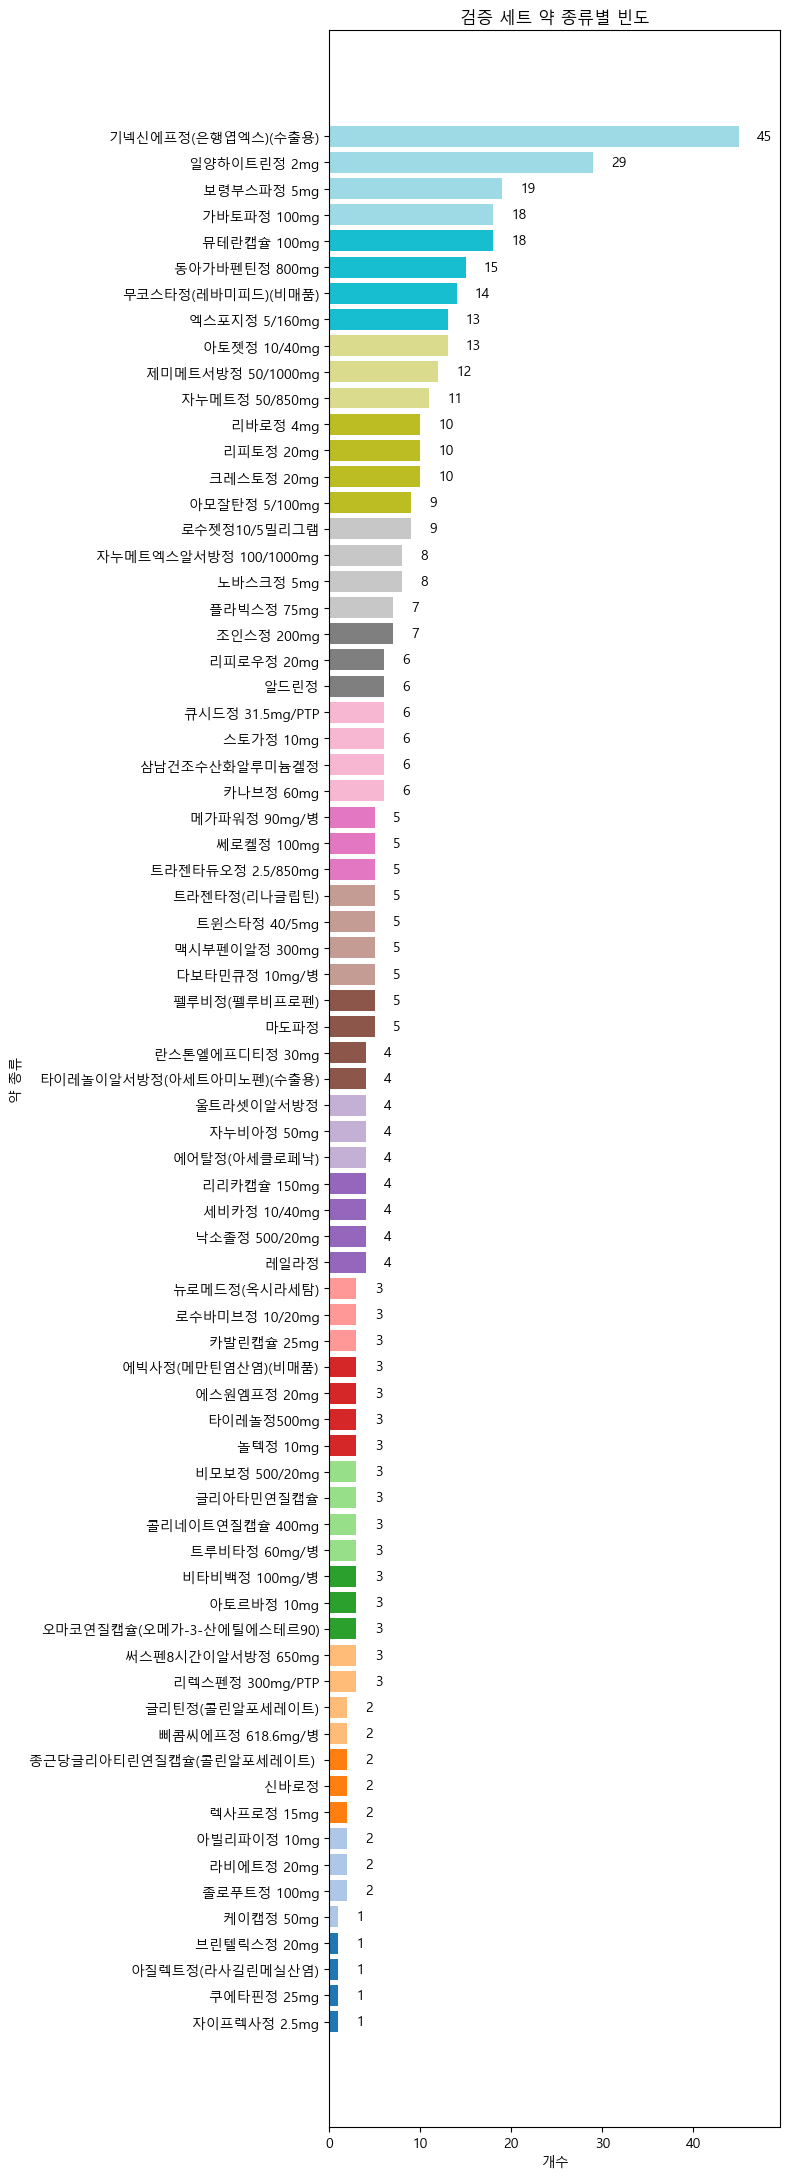

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
mapping_df  = pd.read_csv('category_id_name_mapping.csv')
excluded_df = pd.read_csv('excluded_annotations.csv')
train_df    = pd.read_csv('train_annotations.csv')
val_df      = pd.read_csv('val_annotations.csv')

def plot_distribution(df, mapping_df, title):
    # 카테고리별 개수 집계
    counts = df['categories_id'].value_counts().sort_index()
    cnt_df = counts.rename_axis('categories_id').reset_index(name='count')
    # 이름 매핑 및 정렬
    merged = cnt_df.merge(mapping_df, on='categories_id').sort_values('count')
    names = merged['categories_name']
    values = merged['count']
    # 색상
    colors = plt.cm.tab20(np.linspace(0, 1, len(merged)))
    # 그리기
    fig, ax = plt.subplots(figsize=(8, max(6, len(merged) * 0.3)))
    bars = ax.barh(names, values, color=colors)
    for bar in bars:
        w = bar.get_width()
        ax.text(w + 2, bar.get_y() + bar.get_height() / 2, f"{int(w)}", va='center')
    ax.set_xlim(0, values.max() * 1.1)
    ax.set_xlabel('개수')
    ax.set_ylabel('약 종류')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# 전체, 검증, 학습 분포 시각화
plot_distribution(excluded_df, mapping_df, '전체 약 종류별 빈도')
plot_distribution(train_df,    mapping_df, '학습 세트 약 종류별 빈도')
plot_distribution(val_df,      mapping_df, '검증 세트 약 종류별 빈도')